# Project Boston
This notebook will attempt to break down the following questions from the 2015, 2016, and 2017 Boston marathons

* What were the average finish times per age group
* What percentage from each age group managed to BQ in the boston marathon
* What were the pacing profiles from the top 5 athletes 
* What were the pacing profiles by gender
* What were the pacing profiles by time
* What percentage of runners "hit the wall" by finish time
* How much of a slowdown did the wall have on runners by finish time
* Standard deviation of pace by finishing time

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import datetime as DT
plt.style.use('fivethirtyeight')
color = '#334a58'

In [2]:
df15 = pd.read_csv('.\\data\\2015.csv', index_col='Overall')
df16 = pd.read_csv('.\\data\\2016.csv', index_col='Overall')
df17 = pd.read_csv('.\\data\\2016.csv', index_col='Overall')
# qualifying times in 2015
qtm15 = {'18-34':'3:03:58', '35-39':'3:08:58', '40-44':'3:13:58',
       '45-49':'3:23:58', '50-54':'3:28:58', '55-59':'3:38:58',
       '60-64':'3:53:58', '65-69':'4:08:58', '70-74':'4:23:58',
       '75-79':'4:38:58', '80+':'4:53:58'}
qtf15 = {'18-34':'3:33:58', '35-39':'3:38:58', '40-44':'3:43:58',
       '45-49':'3:53:58', '50-54':'3:58:58', '55-59':'4:08:58',
       '60-64':'4:23:58', '65-69':'4:38:58', '70-74':'4:53:58',
       '75-79':'5:08:58', '80+':'5:23:58'}

pd.set_option('display.max_columns', None)

In [3]:
# remove excess columns
df15.drop(columns='Unnamed: 0', inplace = True)

In [4]:
df15

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Gender,Division
Overall,,,,,,,,,,,,,,,,,,,,,,,
1,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1
2,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2
3,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3
4,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4
5,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26594,25656,"Prescott, Francine J.",64,F,Boynton Beach,FL,USA,NaN,MI,0:50:15,1:43:31,2:36:53,3:32:26,3:43:46,4:25:53,5:19:44,6:17:19,7:13:34,0:17:31,-,7:38:56,12015,269
26595,31359,"Emerson, Annette C.",61,F,Old Town,ME,USA,NaN,NaN,0:48:36,1:39:39,2:39:13,3:35:58,3:47:55,4:32:44,5:31:58,6:28:56,7:26:19,0:17:59,-,7:51:30,12016,270
26596,25559,"Cerveny, Nona",66,F,Scottsdale,AZ,USA,NaN,NaN,0:53:03,1:47:16,2:41:45,3:37:07,3:48:21,4:33:51,5:38:56,6:38:51,7:36:18,0:18:18,-,7:59:33,12017,91


In [5]:
#test
ttime = df15.loc[1, 'Official Time']
df15.loc[1, 'Official Time']

'2:09:17'

In [6]:
#test
df15['Age'].dtype

dtype('int64')

In [7]:
# function to convert a time string to a net time in minutes
# NOTE: minutes is in base 10
def timeToMins(time):
    time = time.split(':')
    if '-' in time:
        return float('NaN')
    else:
        h_min = float(time[0]) * 60
        m_min = float(time[1])
        s_min = float(time[2]) / 60
        return h_min + m_min + s_min

In [8]:
print(timeToMins(ttime))

129.28333333333333


In [9]:
filt = (18 <= df15['Age']) & (df15['Age'] <= 34)
df15.loc[filt]

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Gender,Division
Overall,,,,,,,,,,,,,,,,,,,,,,,
1,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1
2,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2
3,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3
4,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4
5,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26550,29879,"Hannon, Sarah",29,F,Quincy,MA,USA,NaN,NaN,0:35:26,1:12:06,1:50:35,2:32:39,2:41:49,3:17:48,4:04:08,4:55:03,5:42:44,0:13:53,-,6:03:51,11996,5997
26559,27458,"Thomas, Jenna",26,F,Woburn,MA,USA,NaN,NaN,0:37:38,1:12:57,1:51:06,2:36:30,2:46:43,3:27:45,4:21:50,5:04:17,5:46:53,0:13:57,-,6:05:26,12000,6000
26568,26907,"Lynch, Kathleen C.",26,F,Waltham,MA,USA,NaN,NaN,0:37:46,1:14:34,1:54:20,2:35:30,2:44:43,3:19:30,4:10:21,5:00:21,5:48:01,0:14:01,-,6:07:06,12005,6001


In [10]:
# age categories
age_groups = {18:34, 35:39, 40:44, 45:49, 50:54, 55:59, 60:64, 65:69, 70:74, 75:79}
AgeClusters = [str(age1) + '-' + str(age2) for age1, age2 in age_groups.items()]
for index, age in enumerate(age_groups):
    filt = (age <= df15['Age']) & (df15['Age'] <= age_groups[age])
    df15.loc[filt, 'AgeCluster'] = AgeClusters[index]

# 80+ age category
AgeClusters.append('80+')
df15.loc[(80 <= df15['Age']), 'AgeCluster'] = AgeClusters[10]

In [11]:
age_grp = df15.groupby(['AgeCluster'])

In [12]:
# duplicates the column
df15['QualifyTime'] = df15['AgeCluster']

In [13]:
# map the qualifying times for M/F for Boston 2015
filt = df15['M/F'] == 'M'
df15.loc[filt, 'QualifyTime'] = df15['QualifyTime'].map(qtm15)
filt = df15['M/F'] == 'F'
df15.loc[filt, 'QualifyTime'] = df15['QualifyTime'].map(qtf15)

In [14]:
df15

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Gender,Division,AgeCluster,QualifyTime
Overall,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,18-34,3:03:58
2,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,18-34,3:03:58
3,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,18-34,3:03:58
4,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,18-34,3:03:58
5,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,18-34,3:03:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26594,25656,"Prescott, Francine J.",64,F,Boynton Beach,FL,USA,NaN,MI,0:50:15,1:43:31,2:36:53,3:32:26,3:43:46,4:25:53,5:19:44,6:17:19,7:13:34,0:17:31,-,7:38:56,12015,269,60-64,4:23:58
26595,31359,"Emerson, Annette C.",61,F,Old Town,ME,USA,NaN,NaN,0:48:36,1:39:39,2:39:13,3:35:58,3:47:55,4:32:44,5:31:58,6:28:56,7:26:19,0:17:59,-,7:51:30,12016,270,60-64,4:23:58
26596,25559,"Cerveny, Nona",66,F,Scottsdale,AZ,USA,NaN,NaN,0:53:03,1:47:16,2:41:45,3:37:07,3:48:21,4:33:51,5:38:56,6:38:51,7:36:18,0:18:18,-,7:59:33,12017,91,65-69,4:38:58


In [15]:
age_grp.get_group('18-34')

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Gender,Division,AgeCluster,QualifyTime
Overall,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,18-34,3:03:58
2,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,18-34,3:03:58
3,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,18-34,3:03:58
4,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,18-34,3:03:58
5,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,18-34,3:03:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26550,29879,"Hannon, Sarah",29,F,Quincy,MA,USA,NaN,NaN,0:35:26,1:12:06,1:50:35,2:32:39,2:41:49,3:17:48,4:04:08,4:55:03,5:42:44,0:13:53,-,6:03:51,11996,5997,18-34,3:33:58
26559,27458,"Thomas, Jenna",26,F,Woburn,MA,USA,NaN,NaN,0:37:38,1:12:57,1:51:06,2:36:30,2:46:43,3:27:45,4:21:50,5:04:17,5:46:53,0:13:57,-,6:05:26,12000,6000,18-34,3:33:58
26568,26907,"Lynch, Kathleen C.",26,F,Waltham,MA,USA,NaN,NaN,0:37:46,1:14:34,1:54:20,2:35:30,2:44:43,3:19:30,4:10:21,5:00:21,5:48:01,0:14:01,-,6:07:06,12005,6001,18-34,3:33:58


In [16]:
median_age = df15['Age'].median()

In [17]:
# get number of male and female finishers by age category
males = df15['M/F'] == 'M'
females = df15['M/F'] == 'F'

malesByAge = df15.loc[males, 'AgeCluster'].value_counts()
femalesByAge = df15.loc[females, 'AgeCluster'].value_counts()
df_Participants = pd.concat([malesByAge, femalesByAge], axis ='columns', ignore_index=True)
df_Participants.rename(columns = {0:'Male Finishers', 1:'Female Finishers'}, inplace=True)
df_Participants

,Male Finishers,Female Finishers
18-34,3215,4144
45-49,2485,1832
40-44,2109,1984
50-54,2055,1206
35-39,1749,1860
55-59,1498,607
60-64,898,270
65-69,403,91
70-74,123,20
75-79,36,2


In [18]:
# get the index of age category sorted
df_Participants.sort_index(inplace=True)

In [19]:
df_Participants

,Male Finishers,Female Finishers
18-34,3215,4144
35-39,1749,1860
40-44,2109,1984
45-49,2485,1832
50-54,2055,1206
55-59,1498,607
60-64,898,270
65-69,403,91
70-74,123,20
75-79,36,2


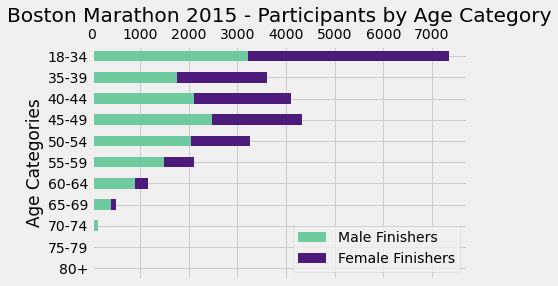

In [20]:
ax = df_Participants.plot.barh(stacked=True, color=['#6fcb9f','#4d1b7b'])
ax.invert_yaxis()
ax.xaxis.tick_top()
plt.title('Boston Marathon 2015 - Participants by Age Category')
plt.ylabel('Age Categories')
plt.legend(loc='lower right')
plt.show()

In [21]:
df15['AgeCluster'].value_counts()

18-34    7359
45-49    4317
40-44    4093
35-39    3609
50-54    3261
55-59    2105
60-64    1168
65-69     494
70-74     143
75-79      38
80+        11
Name: AgeCluster, dtype: int64

In [22]:
df15['Official MTime'] = df15['Official Time'].apply(lambda x: timeToMins(x))
df15['Qualify MTime'] = df15['QualifyTime'].apply(lambda x: timeToMins(x))

In [23]:
# median/mean times per age group in minutes
age_grp['Official MTime'].agg(['median', 'mean'])

,median,mean
AgeCluster,,
18-34,209.550000,219.247556
35-39,211.633333,218.169142
40-44,217.450000,222.454349
45-49,220.733333,225.945923
50-54,224.816667,231.133717
55-59,231.816667,238.632494
60-64,244.800000,251.107277
65-69,260.366667,266.902429
70-74,275.566667,280.142308


In [24]:
# filter by faster than BQ and gender
beatBQM = (df15['Official MTime'] < df15['Qualify MTime']) & (df15['M/F'] == 'M')
beatBQF = (df15['Official MTime'] < df15['Qualify MTime']) & (df15['M/F'] == 'F')

# group by age group and the above filters
BQMage_grp = df15.loc[beatBQM].groupby(['AgeCluster'])
BQFage_grp = df15.loc[beatBQF].groupby(['AgeCluster'])

In [25]:
df15.loc[beatBQM, 'Official MTime'].median()

185.45833333333331

In [26]:
df15.loc[beatBQM]

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Gender,Division,AgeCluster,QualifyTime,Official MTime,Qualify MTime
Overall,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,18-34,3:03:58,129.283333,183.966667
2,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,18-34,3:03:58,129.800000,183.966667
3,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,18-34,3:03:58,130.366667,183.966667
4,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,18-34,3:03:58,130.783333,183.966667
5,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,18-34,3:03:58,130.816667,183.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,25343,"Schleisman, Jim T",81,M,Jefferson,IA,USA,NaN,NaN,0:28:56,0:58:11,1:28:20,1:59:24,2:06:14,2:31:07,3:04:02,3:37:42,4:11:24,0:10:11,-,4:26:49,12841,3,80+,4:53:58,266.816667,293.966667
22880,25447,"Kwan, Peter",77,M,Edmonton,AB,CAN,NaN,NaN,0:28:57,0:59:43,1:31:17,2:03:49,2:10:45,2:35:50,3:08:59,3:42:27,4:14:50,0:10:17,-,4:29:26,12959,12,75-79,4:38:58,269.433333,278.966667
22950,25379,"Kelly, Frank",76,M,Saint John,NB,CAN,NaN,NaN,0:28:57,0:58:18,1:28:38,1:59:47,2:06:49,2:34:05,3:07:13,3:41:29,4:15:26,0:10:19,-,4:30:06,12993,13,75-79,4:38:58,270.100000,278.966667


In [27]:
# total number of finishers
tot = age_grp['Name'].count()

# number of male BQ finishers
BQM = BQMage_grp['Name'].count()

# number of female BQ finishers
BQF = BQFage_grp['Name'].count()

# new dataframe with all the finisher numbers
# concatenated along the column axis
# ignore "Name" index
df_MF = pd.concat([BQM, BQF, tot], axis='columns', ignore_index=True)

# rename ignore_index default column names
df_MF.rename(columns = {0:'MaleBQ', 1:'FemaleBQ', 2:'TotalFinishers'}, inplace=True)

# create columns for percentage of BQers from each gender
df_MF['MaleBQPct'] = (df_MF['MaleBQ']/df_MF['TotalFinishers'])
df_MF['FemaleBQPct'] = (df_MF['FemaleBQ']/df_MF['TotalFinishers'])

# new dataframe for percentage series 
df_MFPct = pd.concat([df_MF['MaleBQPct'],  df_MF['FemaleBQPct']], axis='columns')

In [28]:
df_MF

,MaleBQ,FemaleBQ,TotalFinishers,MaleBQPct,FemaleBQPct
18-34,1627,1772.0,7359,0.221090,0.240794
35-39,860,862.0,3609,0.238293,0.238847
40-44,954,851.0,4093,0.233081,0.207916
45-49,1186,905.0,4317,0.274728,0.209636
50-54,857,595.0,3261,0.262803,0.182459
55-59,630,291.0,2105,0.299287,0.138242
60-64,368,140.0,1168,0.315068,0.119863
65-69,171,41.0,494,0.346154,0.082996
70-74,47,11.0,143,0.328671,0.076923
75-79,15,2.0,38,0.394737,0.052632


In [29]:
df_MFPct

,MaleBQPct,FemaleBQPct
18-34,0.221090,0.240794
35-39,0.238293,0.238847
40-44,0.233081,0.207916
45-49,0.274728,0.209636
50-54,0.262803,0.182459
55-59,0.299287,0.138242
60-64,0.315068,0.119863
65-69,0.346154,0.082996
70-74,0.328671,0.076923
75-79,0.394737,0.052632


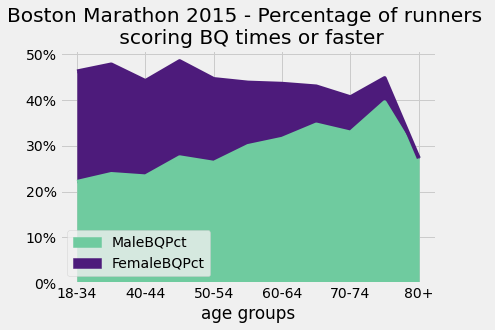

In [30]:
ax = df_MFPct.plot.area(color=['#6fcb9f','#4d1b7b'])
plt.legend()
plt.title('Boston Marathon 2015 - Percentage of runners \n scoring BQ times or faster')
# xmax refers to the multiplication factor in the % equation
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.xlabel('age groups')
plt.show()

In [31]:
df15

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Gender,Division,AgeCluster,QualifyTime,Official MTime,Qualify MTime
Overall,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,18-34,3:03:58,129.283333,183.966667
2,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,18-34,3:03:58,129.800000,183.966667
3,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,18-34,3:03:58,130.366667,183.966667
4,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,18-34,3:03:58,130.783333,183.966667
5,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,18-34,3:03:58,130.816667,183.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26594,25656,"Prescott, Francine J.",64,F,Boynton Beach,FL,USA,NaN,MI,0:50:15,1:43:31,2:36:53,3:32:26,3:43:46,4:25:53,5:19:44,6:17:19,7:13:34,0:17:31,-,7:38:56,12015,269,60-64,4:23:58,458.933333,263.966667
26595,31359,"Emerson, Annette C.",61,F,Old Town,ME,USA,NaN,NaN,0:48:36,1:39:39,2:39:13,3:35:58,3:47:55,4:32:44,5:31:58,6:28:56,7:26:19,0:17:59,-,7:51:30,12016,270,60-64,4:23:58,471.500000,263.966667
26596,25559,"Cerveny, Nona",66,F,Scottsdale,AZ,USA,NaN,NaN,0:53:03,1:47:16,2:41:45,3:37:07,3:48:21,4:33:51,5:38:56,6:38:51,7:36:18,0:18:18,-,7:59:33,12017,91,65-69,4:38:58,479.550000,278.966667


In [32]:
df15.rename(columns={'Half':'21.1K', 'Official Time':'42.2K'}, inplace=True)
df15.rename(columns={'Pace':'Pace (mi/min)'}, inplace=True)

In [33]:
df15

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,21.1K,25K,30K,35K,40K,Pace (mi/min),Proj Time,42.2K,Gender,Division,AgeCluster,QualifyTime,Official MTime,Qualify MTime
Overall,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,18-34,3:03:58,129.283333,183.966667
2,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,18-34,3:03:58,129.800000,183.966667
3,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,18-34,3:03:58,130.366667,183.966667
4,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,18-34,3:03:58,130.783333,183.966667
5,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,18-34,3:03:58,130.816667,183.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26594,25656,"Prescott, Francine J.",64,F,Boynton Beach,FL,USA,NaN,MI,0:50:15,1:43:31,2:36:53,3:32:26,3:43:46,4:25:53,5:19:44,6:17:19,7:13:34,0:17:31,-,7:38:56,12015,269,60-64,4:23:58,458.933333,263.966667
26595,31359,"Emerson, Annette C.",61,F,Old Town,ME,USA,NaN,NaN,0:48:36,1:39:39,2:39:13,3:35:58,3:47:55,4:32:44,5:31:58,6:28:56,7:26:19,0:17:59,-,7:51:30,12016,270,60-64,4:23:58,471.500000,263.966667
26596,25559,"Cerveny, Nona",66,F,Scottsdale,AZ,USA,NaN,NaN,0:53:03,1:47:16,2:41:45,3:37:07,3:48:21,4:33:51,5:38:56,6:38:51,7:36:18,0:18:18,-,7:59:33,12017,91,65-69,4:38:58,479.550000,278.966667


In [34]:
col_names = df15.columns.values[9:18]
col_names = np.append(col_names, df15.columns[20])
col_names

array(['5K', '10K', '15K', '20K', '21.1K', '25K', '30K', '35K', '40K',
       '42.2K'], dtype=object)

In [35]:
distances = {'5K':5, '10K':10, '15K':15, '20K':20, '21.1K':21.1, '25K':25, '30K':30, '35K':35, '40K':40, '42.2K': 42.2}

In [36]:
dfT15 = pd.DataFrame()
for name in col_names:
    dfT15[name] = df15[name].apply(lambda x: timeToMins(x))

In [37]:
# dfT15['Pace'] = df15[name].apply(lambda x: timeToMins(x))
dfT15

,5K,10K,15K,20K,21.1K,25K,30K,35K,40K,42.2K
Overall,,,,,,,,,,
1,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,122.650000,129.283333
2,14.716667,29.716667,44.966667,60.466667,64.016667,76.116667,91.983333,107.983333,122.700000,129.800000
3,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,123.016667,130.366667
4,14.716667,29.733333,45.016667,60.483333,64.033333,76.116667,92.000000,108.050000,123.783333,130.783333
5,14.716667,29.733333,44.966667,60.466667,64.016667,76.116667,92.000000,107.983333,123.450000,130.816667
...,...,...,...,...,...,...,...,...,...,...
26594,50.250000,103.516667,156.883333,212.433333,223.766667,265.883333,319.733333,377.316667,433.566667,458.933333
26595,48.600000,99.650000,159.216667,215.966667,227.916667,272.733333,331.966667,388.933333,446.316667,471.500000
26596,53.050000,107.266667,161.750000,217.116667,228.350000,273.850000,338.933333,398.850000,456.300000,479.550000


In [38]:
for column in dfT15.columns.values:
    dfT15[f'{column}-GP'] = dfT15[column] / distances[column]

In [39]:
dfT15

,5K,10K,15K,20K,21.1K,25K,30K,35K,40K,42.2K,5K-GP,10K-GP,15K-GP,20K-GP,21.1K-GP,25K-GP,30K-GP,35K-GP,40K-GP,42.2K-GP
Overall,,,,,,,,,,,,,,,,,,,,
1,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,122.650000,129.283333,2.943333,2.971667,2.996667,3.024167,3.034755,3.044667,3.066667,3.085238,3.066250,3.063586
2,14.716667,29.716667,44.966667,60.466667,64.016667,76.116667,91.983333,107.983333,122.700000,129.800000,2.943333,2.971667,2.997778,3.023333,3.033965,3.044667,3.066111,3.085238,3.067500,3.075829
3,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,123.016667,130.366667,2.943333,2.971667,2.996667,3.024167,3.034755,3.044667,3.066667,3.085238,3.075417,3.089258
4,14.716667,29.733333,45.016667,60.483333,64.033333,76.116667,92.000000,108.050000,123.783333,130.783333,2.943333,2.973333,3.001111,3.024167,3.034755,3.044667,3.066667,3.087143,3.094583,3.099131
5,14.716667,29.733333,44.966667,60.466667,64.016667,76.116667,92.000000,107.983333,123.450000,130.816667,2.943333,2.973333,2.997778,3.023333,3.033965,3.044667,3.066667,3.085238,3.086250,3.099921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26594,50.250000,103.516667,156.883333,212.433333,223.766667,265.883333,319.733333,377.316667,433.566667,458.933333,10.050000,10.351667,10.458889,10.621667,10.605055,10.635333,10.657778,10.780476,10.839167,10.875197
26595,48.600000,99.650000,159.216667,215.966667,227.916667,272.733333,331.966667,388.933333,446.316667,471.500000,9.720000,9.965000,10.614444,10.798333,10.801738,10.909333,11.065556,11.112381,11.157917,11.172986
26596,53.050000,107.266667,161.750000,217.116667,228.350000,273.850000,338.933333,398.850000,456.300000,479.550000,10.610000,10.726667,10.783333,10.855833,10.822275,10.954000,11.297778,11.395714,11.407500,11.363744


In [40]:
dfT15.columns.values[:10]

array(['5K', '10K', '15K', '20K', '21.1K', '25K', '30K', '35K', '40K',
       '42.2K'], dtype=object)

In [41]:
list(dfT15.columns.values[:10])

['5K', '10K', '15K', '20K', '21.1K', '25K', '30K', '35K', '40K', '42.2K']

In [42]:
import more_itertools as mit

In [43]:
pairs = list(mit.pairwise(list(dfT15.columns.values[:10])))

In [44]:
results = []
for column1, column2 in pairs:
    distance = distances[column2] - distances[column1]
    distance = round(distance, 4)
    results.append(distance)

In [45]:
results

[5, 5, 5, 1.1, 3.9, 5, 5, 5, 2.2]

In [46]:
dfT15['0K-5K'] = dfT15['5K-GP']

In [47]:
for column1, column2 in pairs:
    distance = distances[column2] - distances[column1]
    distance = round(distance, 4)
    time = dfT15[column2] - dfT15[column1]
    dfT15[f'{column1}-{column2}'] = time / distance

In [48]:
dfT15

,5K,10K,15K,20K,21.1K,25K,30K,35K,40K,42.2K,5K-GP,10K-GP,15K-GP,20K-GP,21.1K-GP,25K-GP,30K-GP,35K-GP,40K-GP,42.2K-GP,0K-5K,5K-10K,10K-15K,15K-20K,20K-21.1K,21.1K-25K,25K-30K,30K-35K,35K-40K,40K-42.2K
Overall,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,122.650000,129.283333,2.943333,2.971667,2.996667,3.024167,3.034755,3.044667,3.066667,3.085238,3.066250,3.063586,2.943333,3.000000,3.046667,3.106667,3.227273,3.098291,3.176667,3.196667,2.933333,3.015152
2,14.716667,29.716667,44.966667,60.466667,64.016667,76.116667,91.983333,107.983333,122.700000,129.800000,2.943333,2.971667,2.997778,3.023333,3.033965,3.044667,3.066111,3.085238,3.067500,3.075829,2.943333,3.000000,3.050000,3.100000,3.227273,3.102564,3.173333,3.200000,2.943333,3.227273
3,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,123.016667,130.366667,2.943333,2.971667,2.996667,3.024167,3.034755,3.044667,3.066667,3.085238,3.075417,3.089258,2.943333,3.000000,3.046667,3.106667,3.227273,3.098291,3.176667,3.196667,3.006667,3.340909
4,14.716667,29.733333,45.016667,60.483333,64.033333,76.116667,92.000000,108.050000,123.783333,130.783333,2.943333,2.973333,3.001111,3.024167,3.034755,3.044667,3.066667,3.087143,3.094583,3.099131,2.943333,3.003333,3.056667,3.093333,3.227273,3.098291,3.176667,3.210000,3.146667,3.181818
5,14.716667,29.733333,44.966667,60.466667,64.016667,76.116667,92.000000,107.983333,123.450000,130.816667,2.943333,2.973333,2.997778,3.023333,3.033965,3.044667,3.066667,3.085238,3.086250,3.099921,2.943333,3.003333,3.046667,3.100000,3.227273,3.102564,3.176667,3.196667,3.093333,3.348485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26594,50.250000,103.516667,156.883333,212.433333,223.766667,265.883333,319.733333,377.316667,433.566667,458.933333,10.050000,10.351667,10.458889,10.621667,10.605055,10.635333,10.657778,10.780476,10.839167,10.875197,10.050000,10.653333,10.673333,11.110000,10.303030,10.799145,10.770000,11.516667,11.250000,11.530303
26595,48.600000,99.650000,159.216667,215.966667,227.916667,272.733333,331.966667,388.933333,446.316667,471.500000,9.720000,9.965000,10.614444,10.798333,10.801738,10.909333,11.065556,11.112381,11.157917,11.172986,9.720000,10.210000,11.913333,11.350000,10.863636,11.491453,11.846667,11.393333,11.476667,11.446970
26596,53.050000,107.266667,161.750000,217.116667,228.350000,273.850000,338.933333,398.850000,456.300000,479.550000,10.610000,10.726667,10.783333,10.855833,10.822275,10.954000,11.297778,11.395714,11.407500,11.363744,10.610000,10.843333,10.896667,11.073333,10.212121,11.666667,13.016667,11.983333,11.490000,10.568182


In [49]:
# dataframe pace segment
PS = dfT15.columns.values[20:]
PS

array(['0K-5K', '5K-10K', '10K-15K', '15K-20K', '20K-21.1K', '21.1K-25K',
       '25K-30K', '30K-35K', '35K-40K', '40K-42.2K'], dtype=object)

In [50]:
dfPS15 = pd.DataFrame(index=df15.index)
for column in PS:
    dfPS15[column] = dfT15[column]

In [51]:
dfPS15.shape

(26598, 10)

In [52]:
top5 = dfPS15.head()

In [53]:
top5

,0K-5K,5K-10K,10K-15K,15K-20K,20K-21.1K,21.1K-25K,25K-30K,30K-35K,35K-40K,40K-42.2K
Overall,,,,,,,,,,
1,2.943333,3.000000,3.046667,3.106667,3.227273,3.098291,3.176667,3.196667,2.933333,3.015152
2,2.943333,3.000000,3.050000,3.100000,3.227273,3.102564,3.173333,3.200000,2.943333,3.227273
3,2.943333,3.000000,3.046667,3.106667,3.227273,3.098291,3.176667,3.196667,3.006667,3.340909
4,2.943333,3.003333,3.056667,3.093333,3.227273,3.098291,3.176667,3.210000,3.146667,3.181818
5,2.943333,3.003333,3.046667,3.100000,3.227273,3.102564,3.176667,3.196667,3.093333,3.348485


In [54]:
dfPS15

,0K-5K,5K-10K,10K-15K,15K-20K,20K-21.1K,21.1K-25K,25K-30K,30K-35K,35K-40K,40K-42.2K
Overall,,,,,,,,,,
1,2.943333,3.000000,3.046667,3.106667,3.227273,3.098291,3.176667,3.196667,2.933333,3.015152
2,2.943333,3.000000,3.050000,3.100000,3.227273,3.102564,3.173333,3.200000,2.943333,3.227273
3,2.943333,3.000000,3.046667,3.106667,3.227273,3.098291,3.176667,3.196667,3.006667,3.340909
4,2.943333,3.003333,3.056667,3.093333,3.227273,3.098291,3.176667,3.210000,3.146667,3.181818
5,2.943333,3.003333,3.046667,3.100000,3.227273,3.102564,3.176667,3.196667,3.093333,3.348485
...,...,...,...,...,...,...,...,...,...,...
26594,10.050000,10.653333,10.673333,11.110000,10.303030,10.799145,10.770000,11.516667,11.250000,11.530303
26595,9.720000,10.210000,11.913333,11.350000,10.863636,11.491453,11.846667,11.393333,11.476667,11.446970
26596,10.610000,10.843333,10.896667,11.073333,10.212121,11.666667,13.016667,11.983333,11.490000,10.568182


In [55]:
dfPS15['Pace'] = dfT15['42.2K-GP']

In [56]:
dfPS15

,0K-5K,5K-10K,10K-15K,15K-20K,20K-21.1K,21.1K-25K,25K-30K,30K-35K,35K-40K,40K-42.2K,Pace
Overall,,,,,,,,,,,
1,2.943333,3.000000,3.046667,3.106667,3.227273,3.098291,3.176667,3.196667,2.933333,3.015152,3.063586
2,2.943333,3.000000,3.050000,3.100000,3.227273,3.102564,3.173333,3.200000,2.943333,3.227273,3.075829
3,2.943333,3.000000,3.046667,3.106667,3.227273,3.098291,3.176667,3.196667,3.006667,3.340909,3.089258
4,2.943333,3.003333,3.056667,3.093333,3.227273,3.098291,3.176667,3.210000,3.146667,3.181818,3.099131
5,2.943333,3.003333,3.046667,3.100000,3.227273,3.102564,3.176667,3.196667,3.093333,3.348485,3.099921
...,...,...,...,...,...,...,...,...,...,...,...
26594,10.050000,10.653333,10.673333,11.110000,10.303030,10.799145,10.770000,11.516667,11.250000,11.530303,10.875197
26595,9.720000,10.210000,11.913333,11.350000,10.863636,11.491453,11.846667,11.393333,11.476667,11.446970,11.172986
26596,10.610000,10.843333,10.896667,11.073333,10.212121,11.666667,13.016667,11.983333,11.490000,10.568182,11.363744


In [57]:
dfPS15rat = pd.DataFrame()
columns = dfPS15.columns.values[0:-1]
for column in columns:
    dfPS15rat[column] = dfPS15[column] / dfPS15['Pace']

In [58]:
dfPS15rat

,0K-5K,5K-10K,10K-15K,15K-20K,20K-21.1K,21.1K-25K,25K-30K,30K-35K,35K-40K,40K-42.2K
Overall,,,,,,,,,,
1,0.960748,0.979245,0.994477,1.014062,1.053430,1.011328,1.036911,1.043439,0.957484,0.984190
2,0.956923,0.975347,0.991602,1.007858,1.049237,1.008692,1.031700,1.040370,0.956923,1.049237
3,0.952764,0.971107,0.986213,1.005635,1.044676,1.002924,1.028295,1.034769,0.973265,1.081460
4,0.949729,0.969089,0.986298,0.998129,1.041348,0.999729,1.025018,1.035774,1.015338,1.026681
5,0.949487,0.968842,0.982821,1.000025,1.041082,1.000853,1.024757,1.031209,0.997875,1.080184
...,...,...,...,...,...,...,...,...,...,...
26594,0.924121,0.979599,0.981438,1.021591,0.947388,0.993007,0.990327,1.058985,1.034464,1.060238
26595,0.869955,0.913811,1.066262,1.015843,0.972313,1.028503,1.060296,1.019721,1.027180,1.024522
26596,0.933671,0.954204,0.958898,0.974444,0.898658,1.026657,1.145456,1.054523,1.011110,0.929991


In [59]:
df15.index.astype(str).to_series()

Overall
1            1
2            2
3            3
4            4
5            5
         ...  
26594    26594
26595    26595
26596    26596
26597    26597
26598    26598
Name: Overall, Length: 26598, dtype: object

In [60]:
df15['Name']

Overall
1               Desisa, Lelisa
2        Tsegay, Yemane Adhane
3               Chebet, Wilson
4             Kipyego, Bernard
5                Korir, Wesley
                 ...          
26594    Prescott, Francine J.
26595      Emerson, Annette C.
26596            Cerveny, Nona
26597      Buccilli, Alfred P.
26598          Reilly, William
Name: Name, Length: 26598, dtype: object

In [61]:
dfPS15rat['Name'] = df15['Name']

In [62]:
dfPS15rat

,0K-5K,5K-10K,10K-15K,15K-20K,20K-21.1K,21.1K-25K,25K-30K,30K-35K,35K-40K,40K-42.2K,Name
Overall,,,,,,,,,,,
1,0.960748,0.979245,0.994477,1.014062,1.053430,1.011328,1.036911,1.043439,0.957484,0.984190,"Desisa, Lelisa"
2,0.956923,0.975347,0.991602,1.007858,1.049237,1.008692,1.031700,1.040370,0.956923,1.049237,"Tsegay, Yemane Adhane"
3,0.952764,0.971107,0.986213,1.005635,1.044676,1.002924,1.028295,1.034769,0.973265,1.081460,"Chebet, Wilson"
4,0.949729,0.969089,0.986298,0.998129,1.041348,0.999729,1.025018,1.035774,1.015338,1.026681,"Kipyego, Bernard"
5,0.949487,0.968842,0.982821,1.000025,1.041082,1.000853,1.024757,1.031209,0.997875,1.080184,"Korir, Wesley"
...,...,...,...,...,...,...,...,...,...,...,...
26594,0.924121,0.979599,0.981438,1.021591,0.947388,0.993007,0.990327,1.058985,1.034464,1.060238,"Prescott, Francine J."
26595,0.869955,0.913811,1.066262,1.015843,0.972313,1.028503,1.060296,1.019721,1.027180,1.024522,"Emerson, Annette C."
26596,0.933671,0.954204,0.958898,0.974444,0.898658,1.026657,1.145456,1.054523,1.011110,0.929991,"Cerveny, Nona"


In [63]:
dfPS15rat.set_index('Name', inplace=True)

In [64]:
T5Paces = dfPS15rat.head()

In [65]:
T5Paces

,0K-5K,5K-10K,10K-15K,15K-20K,20K-21.1K,21.1K-25K,25K-30K,30K-35K,35K-40K,40K-42.2K
Name,,,,,,,,,,
"Desisa, Lelisa",0.960748,0.979245,0.994477,1.014062,1.053430,1.011328,1.036911,1.043439,0.957484,0.984190
"Tsegay, Yemane Adhane",0.956923,0.975347,0.991602,1.007858,1.049237,1.008692,1.031700,1.040370,0.956923,1.049237
"Chebet, Wilson",0.952764,0.971107,0.986213,1.005635,1.044676,1.002924,1.028295,1.034769,0.973265,1.081460
"Kipyego, Bernard",0.949729,0.969089,0.986298,0.998129,1.041348,0.999729,1.025018,1.035774,1.015338,1.026681
"Korir, Wesley",0.949487,0.968842,0.982821,1.000025,1.041082,1.000853,1.024757,1.031209,0.997875,1.080184


In [66]:
# dataframe tranpose
TT5Paces = T5Paces.T
TT5Paces.index.name = 'Distances'
TT5Paces

Name,"Desisa, Lelisa","Tsegay, Yemane Adhane","Chebet, Wilson","Kipyego, Bernard","Korir, Wesley"
Distances,,,,,
0K-5K,0.960748,0.956923,0.952764,0.949729,0.949487
5K-10K,0.979245,0.975347,0.971107,0.969089,0.968842
10K-15K,0.994477,0.991602,0.986213,0.986298,0.982821
15K-20K,1.014062,1.007858,1.005635,0.998129,1.000025
20K-21.1K,1.053430,1.049237,1.044676,1.041348,1.041082
21.1K-25K,1.011328,1.008692,1.002924,0.999729,1.000853
25K-30K,1.036911,1.031700,1.028295,1.025018,1.024757
30K-35K,1.043439,1.040370,1.034769,1.035774,1.031209
35K-40K,0.957484,0.956923,0.973265,1.015338,0.997875


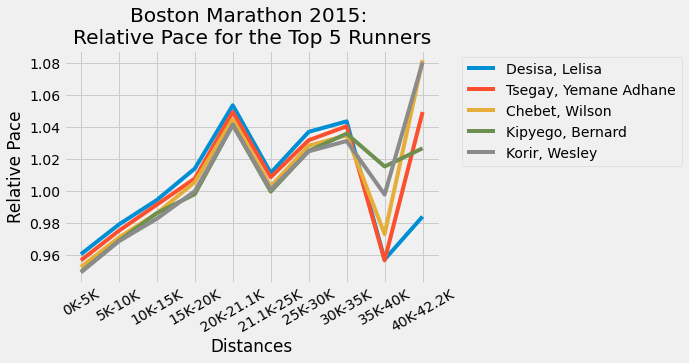

In [67]:
ax = TT5Paces.plot(kind='line')
runners, distances = T5Paces.shape
plt.xticks(np.arange(10), list(TT5Paces.index), rotation = 30)
plt.ylabel('Relative Pace')
plt.title('Boston Marathon 2015: \nRelative Pace for the Top 5 Runners')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()